In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


%matplotlib inline

In [3]:
df=pd.read_csv("Amazon Sale Report.csv")

In [4]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [5]:
df=df.drop(columns=['index'])

In [6]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
128971    False
128972    False
128973    False
128974    False
128975    False
Length: 128976, dtype: bool

In [10]:
df.corr()

,Qty,Amount,ship-postal-code,B2B,New,PendingS
Qty,1.000000,0.066750,-0.010231,0.015810,NaN,NaN
Amount,0.066750,1.000000,-0.038423,0.015560,NaN,NaN
ship-postal-code,-0.010231,-0.038423,1.000000,-0.035792,NaN,NaN
B2B,0.015810,0.015560,-0.035792,1.000000,NaN,NaN
New,NaN,NaN,NaN,NaN,NaN,NaN
PendingS,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

<AxesSubplot:>

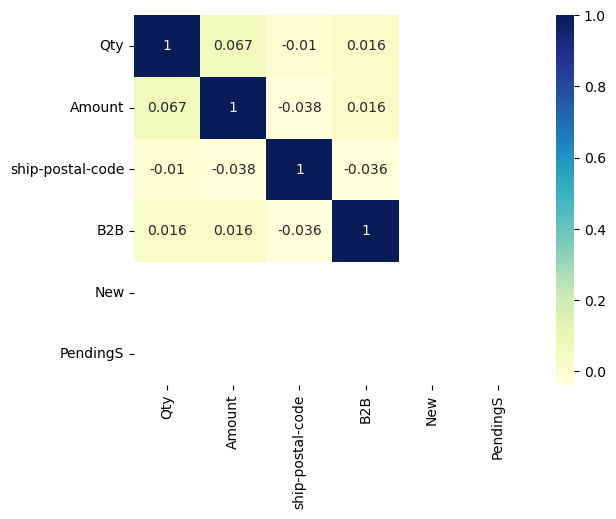

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

### Understanding the overall sales performance,trends and pattern over time

In [18]:
# Converting 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

In [20]:
# Aggregate total sales and number of orders by date

sales_overview = df.groupby('Date').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
sales_overview.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)

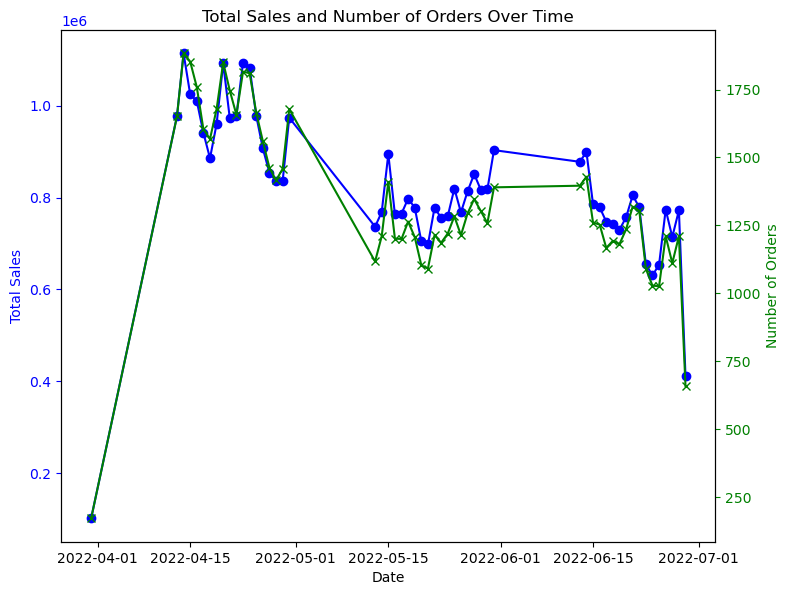

In [23]:
# Plotting total sales and number of orders

fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(sales_overview['Date'], sales_overview['Amount'], color='b', marker='o', label='Total Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(sales_overview['Date'], sales_overview['Number of Orders'], color='g', marker='x', label='Number of Orders')
ax2.set_ylabel('Number of Orders', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
plt.title('Total Sales and Number of Orders Over Time')
plt.show()

### Analyzing the distribution of product categories, sizes, and quantities sold to identify popular products

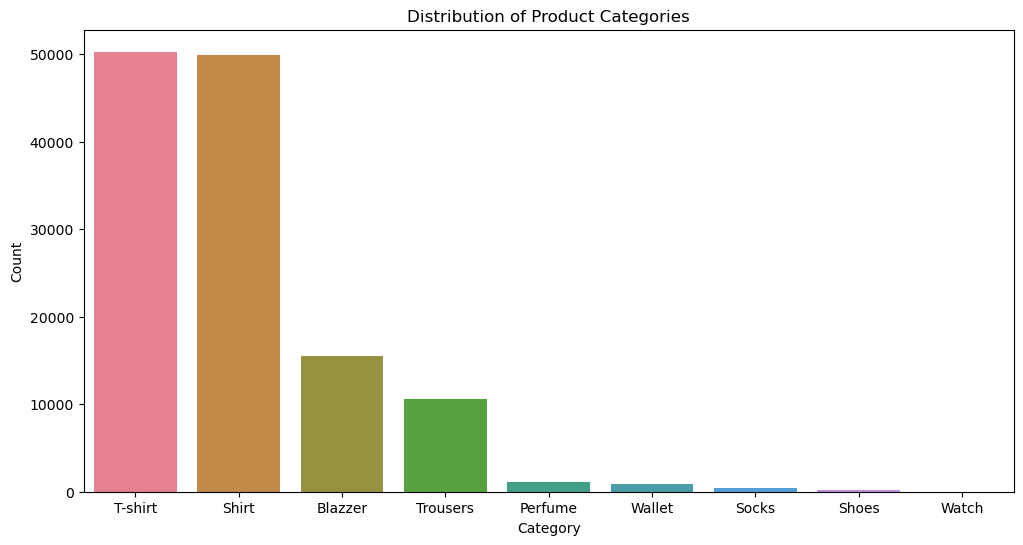

In [28]:
# Plotting distribution of product categories

custom_palette = sns.color_palette("husl",9) 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette=custom_palette)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

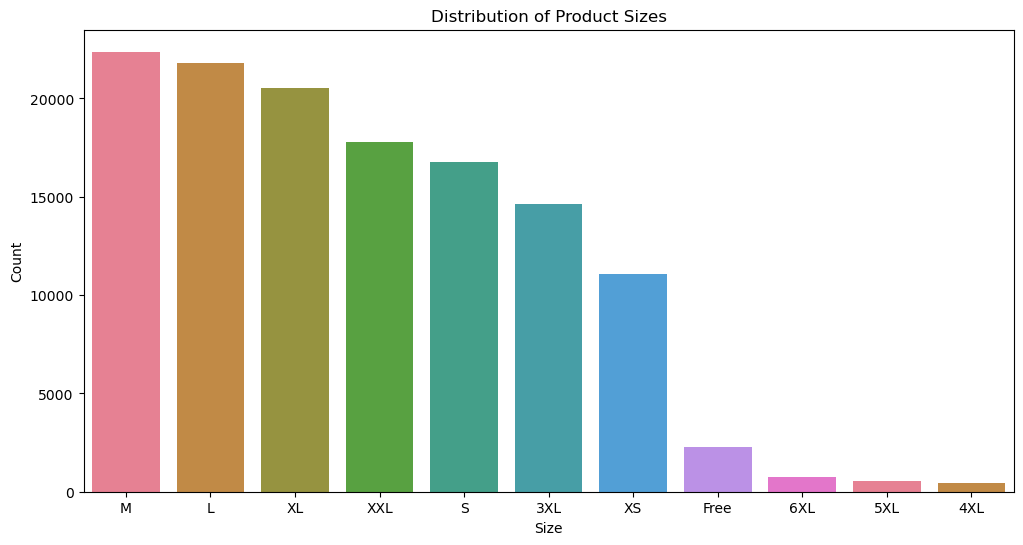

In [29]:
# Plotting distribution of product sizes

custom_palette = sns.color_palette("husl",9) 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Size', order=df['Size'].value_counts().index,palette=custom_palette)
plt.title('Distribution of Product Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

### Investigating the fulfilment methods used and their effectiveness in delivering orders

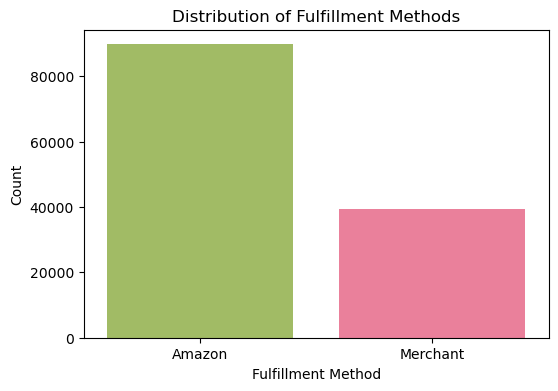

In [37]:
# Plotting distribution of fulfillment methods

color_palette = ['#a7c957', '#fb6f92']
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fulfilment', order=df['Fulfilment'].value_counts().index, palette=color_palette)
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.show()

<Figure size 600x400 with 0 Axes>

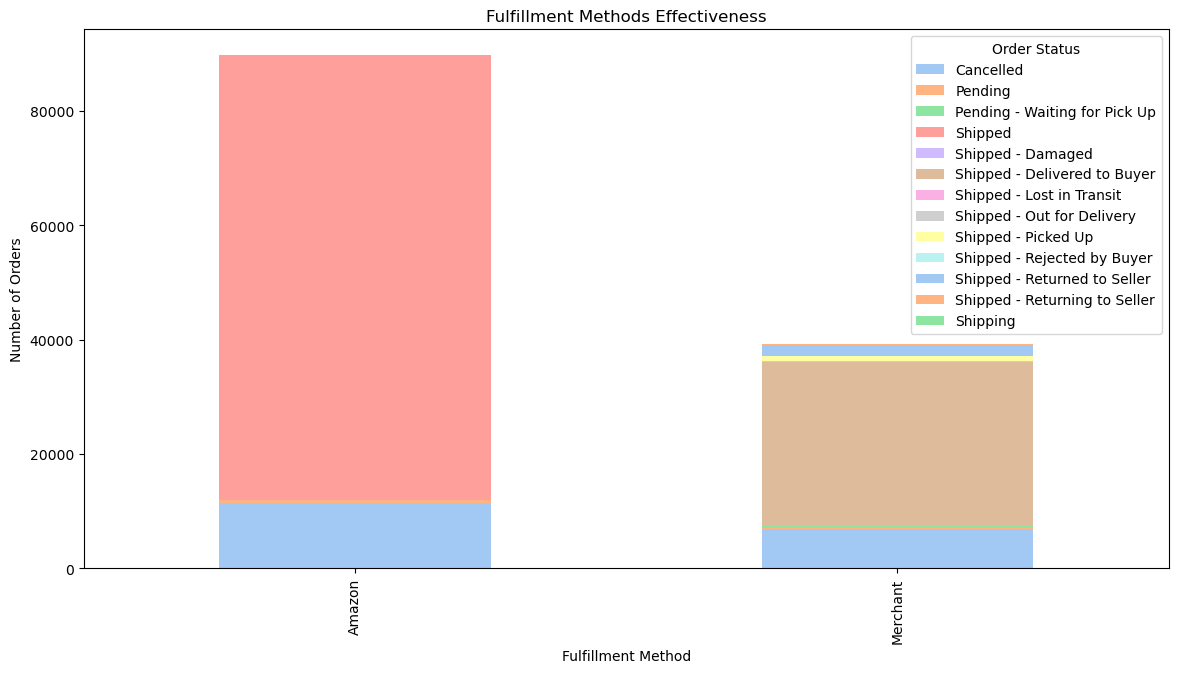

In [36]:
# Analyzing the effectiveness based on 'Status'

custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(6, 4))
fulfillment_effectiveness = df.groupby(['Fulfilment', 'Status']).size().unstack().fillna(0)
fulfillment_effectiveness.plot(kind='bar', stacked=True, figsize=(14, 7), color=custom_palette)
plt.title('Fulfillment Methods Effectiveness')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.legend(title='Order Status')
plt.show()

### Segment customers based on their buying behaviour,location and other relevant factors

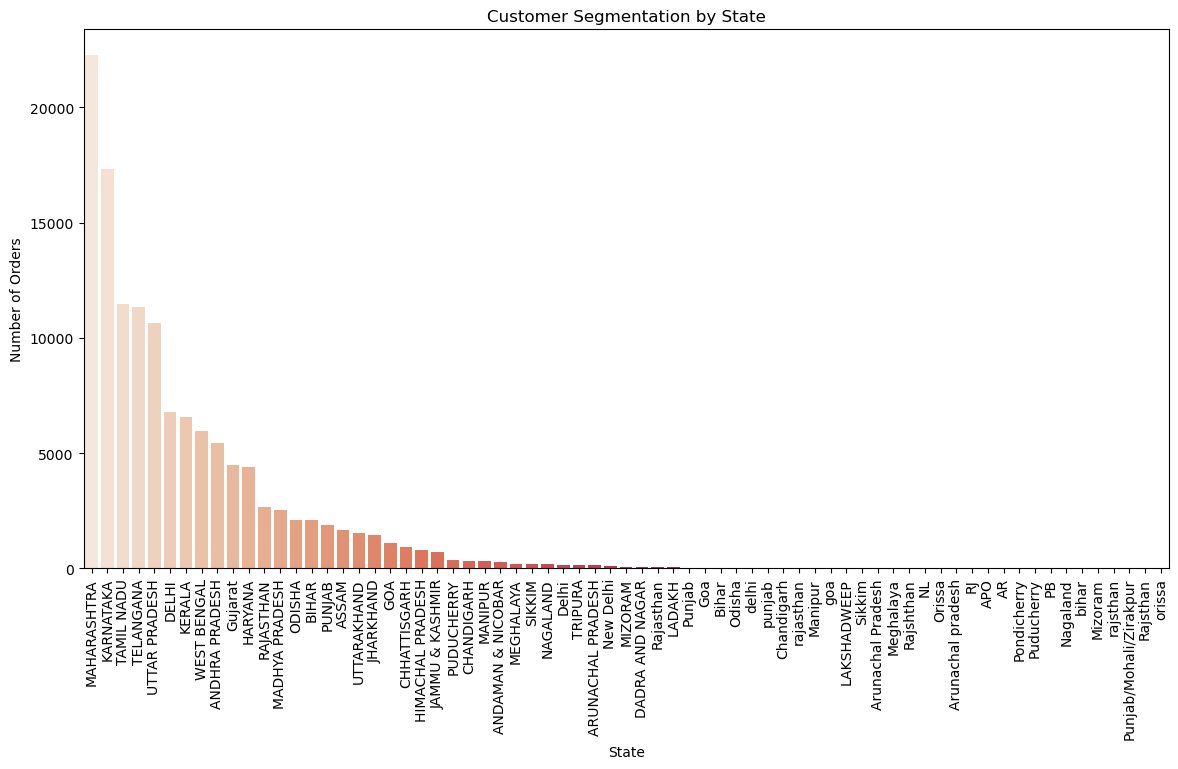

In [39]:
# Segmentation by state

state_segmentation = df['ship-state'].value_counts().reset_index()
state_segmentation.columns = ['State', 'Number of Orders']

custom_palette = sns.color_palette("rocket_r", len(state_segmentation))
plt.figure(figsize=(14, 7))
sns.barplot(data=state_segmentation, x='State', y='Number of Orders', palette=custom_palette)
plt.title('Customer Segmentation by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

### Explore the geographical distribution of sales,focusing on states and cities

In [41]:
# Aggregate sales by state and city

geo_sales = df.groupby(['ship-state', 'ship-city']).agg({'Amount': 'sum'}).reset_index()

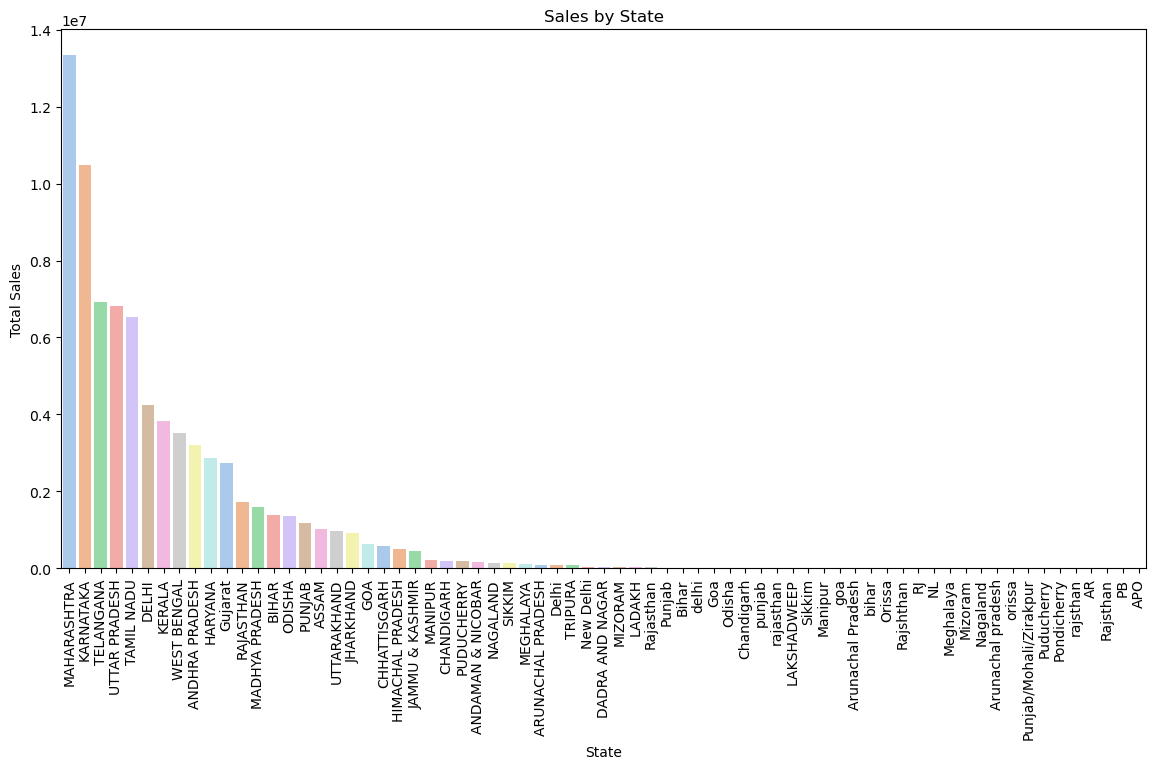

In [44]:
# Plot sales by state

state_sales = geo_sales.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()
state_sales = state_sales.sort_values('Amount', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=state_sales, x='ship-state', y='Amount', palette='pastel')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

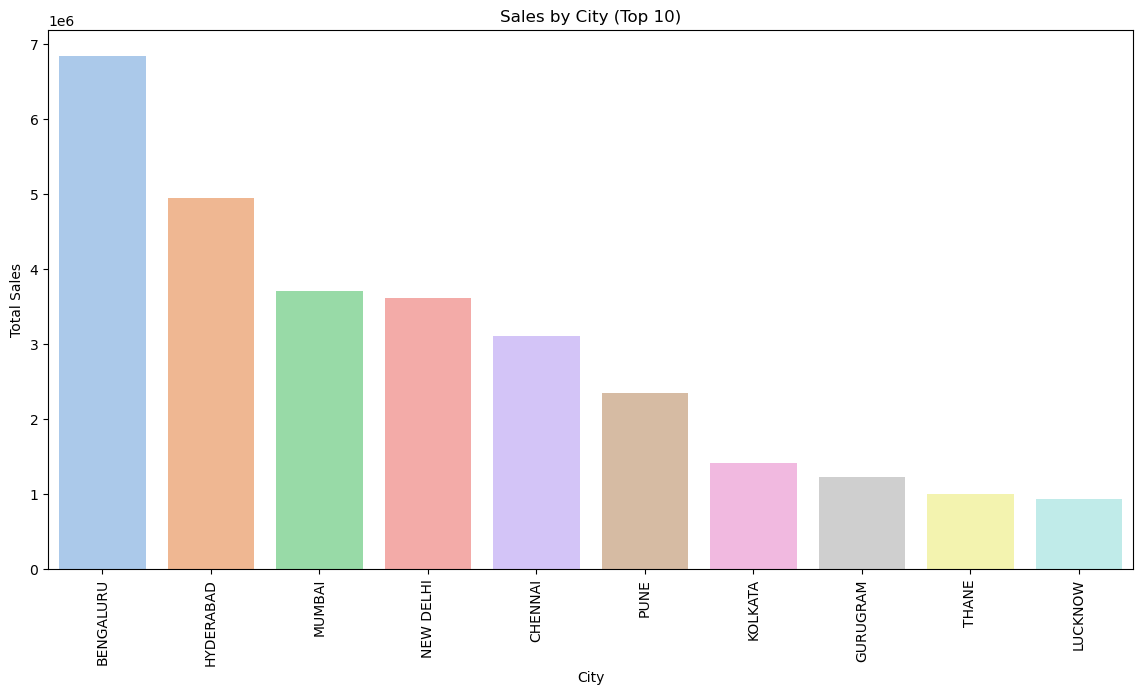

In [45]:
# Plotting sales by city (top 10 cities)

city_sales = geo_sales.groupby('ship-city').agg({'Amount': 'sum'}).reset_index()
city_sales = city_sales.sort_values('Amount', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(data=city_sales, x='ship-city', y='Amount', palette='pastel')
plt.title('Sales by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()